In [1]:
from os import walk
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from progressbar import ProgressBar
from tqdm import tqdm
import torch.utils.data as Data
import torch.optim as optim
from tqdm import tqdm
from torch.autograd import Variable
import time
import multiprocessing as mp
from os import walk
import matplotlib.pyplot as plt
feat_num = 9

In [2]:
time_list = []
path = "/home/wuwenjun/Data/AlphaNet_Original_Input_12.14/"
data_path = path + "Data/"
dataframe_list = pd.DataFrame()
for f, _, i in walk(data_path):
    for j in tqdm(i):
        time_list.append(j)
time_list.sort()     
time_list

100%|██████████| 26/26 [00:00<00:00, 208512.24it/s]


['2015-01-01_2015-03-01.par',
 '2015-03-01_2015-06-01.par',
 '2015-06-01_2015-09-01.par',
 '2015-09-01_2016-01-01.par',
 '2016-01-01_2016-03-01.par',
 '2016-03-01_2016-06-01.par',
 '2016-06-01_2016-09-01.par',
 '2016-09-01_2017-01-01.par',
 '2017-01-01_2017-03-01.par',
 '2017-03-01_2017-06-01.par',
 '2017-06-01_2017-09-01.par',
 '2017-09-01_2018-01-01.par',
 '2018-01-01_2018-03-01.par',
 '2018-03-01_2018-06-01.par',
 '2018-06-01_2018-09-01.par',
 '2018-09-01_2019-01-01.par',
 '2019-01-01_2019-03-01.par',
 '2019-03-01_2019-06-01.par',
 '2019-06-01_2019-09-01.par',
 '2019-09-01_2020-01-01.par',
 '2020-01-01_2020-03-01.par',
 '2020-03-01_2020-06-01.par',
 '2020-06-01_2020-09-01.par',
 '2020-09-01_2021-01-01.par',
 '2021-01-01_2021-03-01.par',
 '2021-03-01_2021-06-01.par']

In [3]:
trainx , trainy , testx , testy = [] , [] , [],  []

for train in tqdm(time_list[:15]):
    trainx.append(pd.read_parquet(path+ "Pooling_Norm_Daily/" + train).set_index(["timestamp","ticker"]))
    trainy.append(pd.read_parquet(data_path + train).set_index(["timestamp","ticker"])['target'])
trainx = pd.concat(trainx,axis=0)
trainy = pd.concat(trainy,axis=0)

display(trainx)
display(trainy)

for test in tqdm(time_list[15:16]):
    testx.append(pd.read_parquet(path+ "Pooling_Norm_Daily/" + test).set_index(["timestamp","ticker"]))
    testy.append(pd.read_parquet(data_path + test).set_index(["timestamp","ticker"])['target'])
testx = pd.concat(testx,axis=0)
testy = pd.concat(testy,axis=0)

display(testx)
display(testy)

100%|██████████| 15/15 [00:14<00:00,  1.03it/s]


0         1         2         3         4  \
timestamp           ticker                                                     
2015-02-16 09:30:00 1       0.207835  0.021603 -0.232302  0.102923  0.104148   
                    2      -0.008425  0.686842  0.923933  0.032671  0.302827   
                    4       0.165433  0.268239  0.229207  0.267198  0.310251   
                    5      -6.643060 -4.858433 -2.362234 -6.982301 -5.445385   
                    6       0.335928  0.837268  0.954616 -0.215565  0.370120   
...                              ...       ...       ...       ...       ...   
2018-08-31 09:30:00 603105  0.733127  0.955503  0.675607  0.746218  0.495712   
                    603706  0.394424  1.160339  1.248907  0.167258  0.712171   
                    2932    0.733315  1.136306  1.152970  0.762307  0.052966   
                    603713  0.897426  1.051528  0.757490  0.886250  0.915914   
                    601869  0.852073  0.822496  0.789205  0.446307  0.965142   

                                   5         6         7         8         9  \
timestamp           ticker                                                     
2015-02-16 09:30:00 1       0.236395  0.278850 -0.225329 -0.100755  0.259385   
                    2       0.353685 -0.078937  0.582956  0.785258  0.059245   
                    4       0.431001  0.230152 -0.105396 -0.019377  0.240572   
                    5      -3.041905 -5.276937 -3.781414 -1.631203 -3.841965   
                    6       0.692102  0.669607  0.755538  0.726796  0.250522   
...                              ...       ...       ...       ...       ...   
2018-08-31 09:30:00 603105  0.229250  1.501013  1.271233  1.133716  0.801183   
                    603706  0.776570 -0.178501 -0.061398  0.208765  0.431005   
                    2932   -0.106913  1.282263  1.161243  1.041229  0.792794   
                    603713  0.580090  1.514834  0.952192  0.416578  0.857629   
                    601869  1.172572  1.151787  0.859231  0.785055  0.694072   

                            ...       179       180       181       182  \
timestamp           ticker  ...                                           
2015-02-16 09:30:00 1       ... -0.050158 -0.299700 -0.036359  0.249617   
                    2       ... -0.451639 -0.322694 -0.144551  0.141399   
                    4       ...  0.507348 -0.189535  0.030498  0.201037   
                    5       ... -1.629372 -0.312926 -0.020223  0.283267   
                    6       ... -0.963648 -0.316599 -0.203911  0.142547   
...                         ...       ...       ...       ...       ...   
2018-08-31 09:30:00 603105  ... -0.490886 -0.314797  0.099571  0.370953   
                    603706  ...  0.315948 -0.283720  0.166792  0.353054   
                    2932    ... -0.048001 -0.233954 -4.785856 -6.316602   
                    603713  ... -0.011322 -0.387854 -0.022507  0.293094   
                    601869  ...  0.697245 -0.402946  0.055902  0.403741   

                                  183        184       185        186  \
timestamp           ticker                                              
2015-02-16 09:30:00 1       -0.049063  -0.051807 -0.035366  -0.050169   
                    2       -0.049388  -0.052816 -0.440137  -0.050494   
                    4       -0.049439  -0.047686  0.526572  -0.050544   
                    5       -0.058463  -0.070131 -1.627277  -0.059570   
                    6       -0.048793  -0.054499 -0.956212  -0.049898   
...                               ...        ...       ...        ...   
2018-08-31 09:30:00 603105   2.183763   2.163369 -0.475673   1.863654   
                    603706   0.307726   0.299930  0.337143   0.257451   
                    2932     4.358834   4.333511 -0.029506   3.725881   
                    603713  10.489654  10.488552  0.007452   8.974895   
                    601869  17.999250  17.988476  0.721281  15.404371   

                           

timestamp            ticker
2015-02-16 09:30:00  1         0.005735
2015-02-17 09:30:00  1         0.001433
2015-02-25 09:30:00  1        -0.029915
2015-02-26 09:30:00  1        -0.021739
2015-02-27 09:30:00  1        -0.049075
                                 ...   
2018-08-28 09:30:00  603713    0.115367
2018-08-29 09:30:00  603713    0.247150
2018-08-30 09:30:00  603713   -0.007933
2018-08-31 09:30:00  603713   -0.049471
                     601869   -0.065515
Name: target, Length: 2633732, dtype: float64

100%|██████████| 1/1 [00:01<00:00,  1.10s/it]


0         1         2         3         4  \
timestamp           ticker                                                     
2018-09-03 09:30:00 1      -0.126743  0.361532  0.715298  0.850996  0.896316   
                    2       0.342396  0.835195  0.958485  0.435166  1.076377   
                    4       0.205653 -1.082305 -2.525759  0.618130  0.773066   
                    5      -1.205493 -0.719799 -0.146944  0.055428  0.710784   
                    6      -0.506803 -0.218512  0.292980 -0.074716  0.082770   
...                              ...       ...       ...       ...       ...   
2018-12-28 09:30:00 2939   -0.452198 -1.845508 -2.647037 -0.516768 -0.662042   
                    300674  0.691456  0.998374  0.799100  0.932485  1.464366   
                    300751 -0.021093  0.578300  0.772921 -0.778385  0.184306   
                    603220  0.666352  0.588471  0.138635  1.206092  1.250685   
                    601319  0.901552  0.812680  0.331088  1.153359  0.622609   

                                   5         6         7         8         9  \
timestamp           ticker                                                     
2018-09-03 09:30:00 1       0.907846  0.666987  0.818231  0.867440  0.517876   
                    2       1.247559  0.559703  1.230981  1.267402  0.293685   
                    4       0.665149  1.127301  1.077506  0.047853  0.621403   
                    5       0.874888 -1.016846  0.050263  0.751509 -0.591361   
                    6       0.425141 -1.108359 -0.257720  0.296636 -0.488193   
...                              ...       ...       ...       ...       ...   
2018-12-28 09:30:00 2939   -0.877730  0.195717 -0.633169 -1.495853  0.087365   
                    300674  1.230358  1.352760  0.757724 -0.044578  1.125293   
                    300751  0.525551 -0.934320 -0.153188  0.506217 -0.013834   
                    603220  0.764004  1.436141  0.936301  0.294924  1.031690   
                    601319 -0.035588  1.423128  2.061570  1.706225  0.978106   

                            ...       179       180       181       182  \
timestamp           ticker  ...                                           
2018-09-03 09:30:00 1       ... -1.008735 -0.266884  0.108826  0.359862   
                    2       ...  0.507300 -0.296468  0.062419  0.310231   
                    4       ... -0.399083 -0.244984 -0.652709 -0.697390   
                    5       ... -0.229328 -0.123522  0.151820  0.259010   
                    6       ...  1.034325 -0.283916  0.047948  0.242977   
...                         ...       ...       ...       ...       ...   
2018-12-28 09:30:00 2939    ...  0.766687 -0.345628 -3.001425 -3.008193   
                    300674  ...  0.857581 -0.236602 -0.002468  0.358573   
                    300751  ...  0.218278 -0.296550 -0.017509  0.368119   
                    603220  ...  1.964771 -0.267107 -0.033911  0.314387   
                    601319  ...  0.167757 -0.219553  0.030216  0.349827   

                                  183        184       185        186  \
timestamp           ticker                                              
2018-09-03 09:30:00 1       -0.042363  -0.038450 -1.003531  -0.043423   
                    2       -0.065892  -0.058580  0.535415  -0.066757   
                    4        0.006011   0.000064 -0.384416   0.004598   
                    5       -0.057812  -0.073300 -0.212032  -0.058750   
                    6       -0.052160  -0.040830  1.070131  -0.053134   
...                               ...        ...       ...        ...   
2018-12-28 09:30:00 2939    -0.075577  -0.072208  0.779757  -0.076633   
                    300674   2.372736   2.414496  0.870571   2.370363   
                    300751  -0.072339  -0.078374  0.231871  -0.073396   
                    603220  57.625168  57.599373  1.976708  57.593060   
                    601319   4.817881   4.807986  0.181390   4.814191   

                           

timestamp            ticker
2018-09-03 09:30:00  1        -0.007929
2018-09-04 09:30:00  1        -0.029412
2018-09-05 09:30:00  1        -0.041748
2018-09-06 09:30:00  1         0.003980
2018-09-07 09:30:00  1        -0.005976
                                 ...   
2018-12-27 09:30:00  300751    0.144650
2018-12-28 09:30:00  300751    0.220120
2018-12-27 09:30:00  603220   -0.111014
2018-12-28 09:30:00  603220   -0.057066
                     601319    0.001821
Name: target, Length: 279750, dtype: float64

In [4]:
train = pd.concat([trainx,trainy],axis=1)
train.dropna(inplace=True)
trainx = train.drop("target",axis=1)
trainy = train['target']
del train
display(trainx)
display(trainy)

0         1         2         3         4  \
timestamp           ticker                                                     
2015-02-16 09:30:00 1       0.207835  0.021603 -0.232302  0.102923  0.104148   
                    2      -0.008425  0.686842  0.923933  0.032671  0.302827   
                    4       0.165433  0.268239  0.229207  0.267198  0.310251   
                    5      -6.643060 -4.858433 -2.362234 -6.982301 -5.445385   
                    6       0.335928  0.837268  0.954616 -0.215565  0.370120   
...                              ...       ...       ...       ...       ...   
2018-08-31 09:30:00 603993  0.286691  0.543144  0.428980  0.217336  0.093186   
                    603996  0.371067  0.800350  0.645577 -0.062083 -0.053242   
                    603997  0.929708  1.730097  1.712182  0.919589  1.706396   
                    603998  0.313969  0.923376  1.011426  0.757698 -0.214961   
                    603999 -0.844505 -0.205435  0.405348  0.235285  0.303835   

                                   5         6         7         8         9  \
timestamp           ticker                                                     
2015-02-16 09:30:00 1       0.236395  0.278850 -0.225329 -0.100755  0.259385   
                    2       0.353685 -0.078937  0.582956  0.785258  0.059245   
                    4       0.431001  0.230152 -0.105396 -0.019377  0.240572   
                    5      -3.041905 -5.276937 -3.781414 -1.631203 -3.841965   
                    6       0.692102  0.669607  0.755538  0.726796  0.250522   
...                              ...       ...       ...       ...       ...   
2018-08-31 09:30:00 603993  0.135907  0.667731 -0.298650 -0.654317  0.373064   
                    603996  0.083811  0.389649  0.108915 -0.129473  0.389940   
                    603997  1.774076  1.540139  2.807631  2.710832 -4.857638   
                    603998 -1.119225  1.181174  0.017781 -0.779950  0.581082   
                    603999  0.454866 -0.912388 -0.558327 -0.357152 -0.439265   

                            ...       179       180       181       182  \
timestamp           ticker  ...                                           
2015-02-16 09:30:00 1       ... -0.050158 -0.299700 -0.036359  0.249617   
                    2       ... -0.451639 -0.322694 -0.144551  0.141399   
                    4       ...  0.507348 -0.189535  0.030498  0.201037   
                    5       ... -1.629372 -0.312926 -0.020223  0.283267   
                    6       ... -0.963648 -0.316599 -0.203911  0.142547   
...                         ...       ...       ...       ...       ...   
2018-08-31 09:30:00 603993  ... -0.127945 -0.234334 -0.020064  0.156496   
                    603996  ... -0.367682 -0.141189 -0.303491 -0.340743   
                    603997  ... -2.148334 -0.436896  0.072520  0.440077   
                    603998  ...  0.052511 -0.022572  0.246638  0.151096   
                    603999  ...  0.215691 -0.047879  0.435310  0.497305   

                                 183       184       185       186       187  \
timestamp           ticker                                                     
2015-02-16 09:30:00 1      -0.049063 -0.051807 -0.035366 -0.050169 -0.052982   
                    2      -0.049388 -0.052816 -0.440137 -0.050494 -0.053994   
                    4      -0.049439 -0.047686  0.526572 -0.050544 -0.048859   
                    5      -0.058463 -0.070131 -1.627277 -0.059570 -0.071308   
                    6      -0.048793 -0.054499 -0.956212 -0.049898 -0.055673   
...                              ...       ...       ...       ...       ...   
2018-08-31 09:30:00 603993 -0.080499 -0.075763 -0.110107 -0.095888 -0.112214   
                    603996 -0.115524 -0.128456 -0.351559 -0.104922 -0.116283   
                    603997 -0.167167 -0.256106 -2.145441 -0.149137 -0.225626   
                    603998 -0.036358 -0.019264  0.071903 -0.037147 -0.022751   
                 

timestamp            ticker
2015-02-16 09:30:00  1         0.005735
                     2         0.028436
                     4         0.048152
                     5         0.000000
                     6         0.035770
                                 ...   
2018-08-31 09:30:00  603993   -0.068607
                     603996   -0.028868
                     603997    0.000000
                     603998    0.000000
                     603999   -0.022928
Name: target, Length: 2633720, dtype: float64

In [5]:
test = pd.concat([testx,testy],axis=1)
test.dropna(inplace=True)
testx = test.drop("target",axis=1)
testy = test['target']
index = testy.index
del test
display(testx)
display(testy)

0         1         2         3         4  \
timestamp           ticker                                                     
2018-09-03 09:30:00 1      -0.126743  0.361532  0.715298  0.850996  0.896316   
                    2       0.342396  0.835195  0.958485  0.435166  1.076377   
                    4       0.205653 -1.082305 -2.525759  0.618130  0.773066   
                    5      -1.205493 -0.719799 -0.146944  0.055428  0.710784   
                    6      -0.506803 -0.218512  0.292980 -0.074716  0.082770   
...                              ...       ...       ...       ...       ...   
2018-12-28 09:30:00 603993  0.702547 -0.058408 -0.859879  1.107199  1.392650   
                    603996  0.732471  1.341273  1.191603 -0.793459  0.457886   
                    603997  0.327845 -1.305478 -1.115535  0.007063  0.274337   
                    603998  0.291545  0.721819  0.489630  0.110884  0.162131   
                    603999 -1.122548 -1.100527 -1.227267  0.087899 -1.580393   

                                   5         6         7         8         9  \
timestamp           ticker                                                     
2018-09-03 09:30:00 1       0.907846  0.666987  0.818231  0.867440  0.517876   
                    2       1.247559  0.559703  1.230981  1.267402  0.293685   
                    4       0.665149  1.127301  1.077506  0.047853  0.621403   
                    5       0.874888 -1.016846  0.050263  0.751509 -0.591361   
                    6       0.425141 -1.108359 -0.257720  0.296636 -0.488193   
...                              ...       ...       ...       ...       ...   
2018-12-28 09:30:00 603993  1.192716  0.685822  1.131699  0.771936  0.641559   
                    603996  0.826282  0.396797  1.125884  1.171089  0.451155   
                    603997  0.092465  0.234040 -0.681976 -0.753920  0.203917   
                    603998  0.082163 -0.335185  0.332242  0.704813  0.116400   
                    603999 -1.598155 -1.760606 -1.677107 -1.736354 -0.781126   

                            ...       179       180       181       182  \
timestamp           ticker  ...                                           
2018-09-03 09:30:00 1       ... -1.008735 -0.266884  0.108826  0.359862   
                    2       ...  0.507300 -0.296468  0.062419  0.310231   
                    4       ... -0.399083 -0.244984 -0.652709 -0.697390   
                    5       ... -0.229328 -0.123522  0.151820  0.259010   
                    6       ...  1.034325 -0.283916  0.047948  0.242977   
...                         ...       ...       ...       ...       ...   
2018-12-28 09:30:00 603993  ... -0.593160 -0.248668  0.111815  0.426940   
                    603996  ... -0.470766  0.320315  0.572281  0.467491   
                    603997  ... -1.121747 -0.312482 -0.485329 -0.285179   
                    603998  ...  1.293754 -0.232081  0.026165  0.217558   
                    603999  ... -0.178420 -0.134007  0.226458  0.443281   

                                 183       184       185       186       187  \
timestamp           ticker                                                     
2018-09-03 09:30:00 1      -0.042363 -0.038450 -1.003531 -0.043423 -0.039680   
                    2      -0.065892 -0.058580  0.535415 -0.066757 -0.059642   
                    4       0.006011  0.000064 -0.384416  0.004598  0.001418   
                    5      -0.057812 -0.073300 -0.212032 -0.058750 -0.074267   
                    6      -0.052160 -0.040830  1.070131 -0.053134 -0.042027   
...                              ...       ...       ...       ...       ...   
2018-12-28 09:30:00 603993 -0.076059 -0.085884 -0.578540 -0.077115 -0.087070   
                    603996 -0.041501 -0.072358 -1.720152 -0.042574 -0.061845   
                    603997  0.065443  0.044575 -1.106645  0.064278  0.043284   
                    603998 -0.069564 -0.059908  1.306463 -0.070622 -0.061105   
                 

timestamp            ticker
2018-09-03 09:30:00  1        -0.007929
                     2        -0.018029
                     4        -0.027043
                     5         0.023649
                     6        -0.035120
                                 ...   
2018-12-28 09:30:00  603993    0.029024
                     603996    0.059379
                     603997    0.038615
                     603998    0.033898
                     603999    0.036885
Name: target, Length: 279748, dtype: float64

In [6]:
trainx = torch.from_numpy(np.array(trainx))
trainy = torch.from_numpy(np.array(trainy).reshape(-1,1))
testx = torch.from_numpy(np.array(testx))
testy = torch.from_numpy(np.array(testy).reshape(-1,1))
print("trainx.shape: " , trainx.shape)
print("trainy.shape: " , trainy.shape)
print("testx.shape: " , testx.shape)
print("testy.shape: " , testy.shape)

trainx.shape:  torch.Size([2633720, 189])
trainy.shape:  torch.Size([2633720, 1])
testx.shape:  torch.Size([279748, 189])
testy.shape:  torch.Size([279748, 1])


In [7]:
train_dataset = Data.TensorDataset(trainx, trainy)
test_dataset = Data.TensorDataset(testx, testy)
batch_size = 512
train_loader = Data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=0
)

test_loader = Data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=0
)

In [15]:
class AlphaNet(nn.Module):
    def __init__(self, factor_num, fully_connect_layer_neural):
        super(AlphaNet, self).__init__()
        self.fc1_neuron = int((factor_num * (factor_num - 1) / 2 + 3 * factor_num) * 3)
        self.fc2_neuron = fully_connect_layer_neural
#         self.batch = torch.nn.BatchNorm1d(self.fc1_neuron)
        self.fc1 = torch.nn.Linear(self.fc1_neuron, self.fc2_neuron)
        self.dropout = nn.Dropout(0.3)
        self.relu = nn.ReLU()
        self.out = nn.Linear(self.fc2_neuron, 1)

    def forward(self, x):
#         x = self.batch(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        y_pred = self.out(x)
        return y_pred

In [16]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# trainx = trainx.cuda()
# trainy = trainy.cuda()
# testx = testx.cuda()
# testy = testy.cuda()

In [ ]:
alphanet = AlphaNet(feat_num, 30)
# alphanet = alphanet.cuda()
# alphanet = torch.nn.parallel.DataParallel(alphanet)
print(alphanet)
total_length = trainx.shape[0]
LR = 0.000001
loss_function = nn.MSELoss()
optimizer = optim.RMSprop(alphanet.parameters(), lr=LR, alpha=0.9)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer,step_size=2,gamma = 0.5)
epoch_num = 20
loss_list = []

# for epoch in range(epoch_num):
#     optimizer.step()
#     scheduler.step()
#     lr_list.append(optimizer.state_dict()['param_groups'][0]['lr'])
# plt.plot(range(epoch_num),lr_list,color = 'r')

for epoch in tqdm(range(epoch_num)):
    total_loss = 0
    for _, (data, label) in enumerate(train_loader):
        optimizer.zero_grad()
        data = Variable(data).float()
        label = Variable(label).float()
        pred = alphanet(data)
        loss = loss_function(pred, label)
        loss.backward()
        optimizer.step()
        lr_list.append(optimizer.state_dict()['param_groups'][0]['lr'])
        total_loss += loss.item()
    total_loss = total_loss * batch_size / total_length
    print('Epoch: ', epoch + 1, ' loss: ', total_loss)
    loss_list.append(total_loss)

In [25]:
optimizer = optim.RMSprop(alphanet.parameters(), lr=LR/5, alpha=0.9)
for epoch in tqdm(range(epoch_num)):
    total_loss = 0
    for _, (data, label) in enumerate(train_loader):
        optimizer.zero_grad()
        data = Variable(data).float()
        label = Variable(label).float()
        pred = alphanet(data)
        loss = loss_function(pred, label)
        loss.backward()
        optimizer.step()
        lr_list.append(optimizer.state_dict()['param_groups'][0]['lr'])
        total_loss += loss.item()
    total_loss = total_loss * batch_size / total_length
    print('Epoch: ', epoch + 1, ' loss: ', total_loss)
    loss_list.append(total_loss)

  5%|▌         | 1/20 [00:42<13:33, 42.82s/it]

Epoch:  1  loss:  0.006283161707083618


 10%|█         | 2/20 [01:23<12:31, 41.73s/it]

Epoch:  2  loss:  0.006280106031150384


 15%|█▌        | 3/20 [02:05<11:50, 41.78s/it]

Epoch:  3  loss:  0.006283328327335933


 15%|█▌        | 3/20 [02:12<12:33, 44.32s/it]


KeyboardInterrupt: 

  0%|          | 0/20 [00:00<?, ?it/s]

AlphaNet(
  (fc1): Linear(in_features=189, out_features=30, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (relu): ReLU()
  (out): Linear(in_features=30, out_features=1, bias=True)
)


  5%|▌         | 1/20 [00:48<15:20, 48.45s/it]

Epoch:  1  loss:  0.040702493149522005


 10%|█         | 2/20 [01:35<14:15, 47.51s/it]

Epoch:  2  loss:  0.026867972147315747


 15%|█▌        | 3/20 [02:21<13:19, 47.01s/it]

Epoch:  3  loss:  0.020888448262141153


 20%|██        | 4/20 [03:11<12:47, 47.98s/it]

Epoch:  4  loss:  0.01725648543746442


 25%|██▌       | 5/20 [03:58<11:56, 47.76s/it]

Epoch:  5  loss:  0.014891840390174285


 30%|███       | 6/20 [04:45<11:05, 47.53s/it]

Epoch:  6  loss:  0.013243586859219223


 35%|███▌      | 7/20 [05:33<10:17, 47.54s/it]

Epoch:  7  loss:  0.012074089072019067


 40%|████      | 8/20 [06:19<09:26, 47.21s/it]

Epoch:  8  loss:  0.011189729628436843


 45%|████▌     | 9/20 [07:05<08:33, 46.65s/it]

Epoch:  9  loss:  0.010454807708973226


 50%|█████     | 10/20 [07:51<07:46, 46.63s/it]

Epoch:  10  loss:  0.009894433543044184


 55%|█████▌    | 11/20 [08:38<06:59, 46.57s/it]

Epoch:  11  loss:  0.00943151966766843


 60%|██████    | 12/20 [09:23<06:10, 46.31s/it]

Epoch:  12  loss:  0.009035206293872547


 65%|██████▌   | 13/20 [10:10<05:24, 46.33s/it]

Epoch:  13  loss:  0.008686256989774004


 70%|███████   | 14/20 [10:55<04:36, 46.13s/it]

Epoch:  14  loss:  0.008415238433302588


 75%|███████▌  | 15/20 [11:42<03:51, 46.38s/it]

Epoch:  15  loss:  0.0081680910567359


 80%|████████  | 16/20 [12:30<03:07, 46.78s/it]

Epoch:  16  loss:  0.007956714920025521


 85%|████████▌ | 17/20 [13:16<02:19, 46.42s/it]

Epoch:  17  loss:  0.007771801845529449


 90%|█████████ | 18/20 [14:02<01:32, 46.45s/it]

Epoch:  18  loss:  0.007593552958039589


 95%|█████████▌| 19/20 [14:50<00:46, 46.82s/it]

Epoch:  19  loss:  0.007454926796111411


100%|██████████| 20/20 [15:37<00:00, 46.87s/it]

Epoch:  20  loss:  0.007329649546419309


ValueError: x and y must have same first dimension, but have shapes (20,) and (114597,)

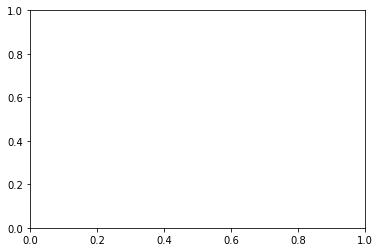

In [18]:
pred_list = []
label_list = []
for _, (data, label) in enumerate(test_loader):
    data = Variable(data).float()
    pred = alphanet(data)
    pred_list.extend(pred.tolist())
    label_list.extend(label.tolist())

# final = pd.concat([test_target, pd.DataFrame(pred_list)], axis=1)
# alpha_name = 'AlphaNetV1_Original_Input_1208'
# final.rename(columns={0: alpha_name, 'ticker': 'symbol'}, inplace=True)
# final = final.reindex(columns=['symbol', 'timestamp', alpha_name,'target'])
# final.set_index(['symbol', 'timestamp']).to_csv(output_path + "result/"+'%s_%s.csv' % (time_start, time_end))

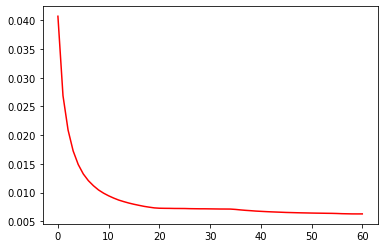

In [27]:
plt.plot(loss_list,color = 'r')

In [29]:
final = pd.DataFrame(pred_list)
final.index = index
final.reset_index(inplace=True)
alpha_name = 'AlphaNet_Original_Input_12.14'
final.rename(columns={0: alpha_name, 'ticker': 'symbol'}, inplace=True)
final

,timestamp,symbol,AlphaNet_Original_Input_12.14
0,2018-09-03 09:30:00,1,-0.045458
1,2018-09-03 09:30:00,2,-0.023337
2,2018-09-03 09:30:00,4,0.028392
3,2018-09-03 09:30:00,5,-0.024332
4,2018-09-03 09:30:00,6,-0.057464
...,...,...,...
279743,2018-12-28 09:30:00,603993,0.036301
279744,2018-12-28 09:30:00,603996,0.036365
279745,2018-12-28 09:30:00,603997,0.011712
279746,2018-12-28 09:30:00,603998,0.033957


In [30]:
final.to_parquet('/home/wuwenjun/Alpha_Factor/AlphaNet_Original_Input_12.14/2018-09-01_2019-01-01.par')

In [85]:
time_list[15:16]

['2018-09-01_2019-01-01.par']